In [10]:
from src import data_depositor
from src import conf
import tables
import matplotlib.pyplot as plt
import os

# Basic Data Extraction
Each variable is a time series accross a single game run.

Unintuitve Variables Encodings:
* player_x_target_states:
    * Before comma: Index of current target ant
    * After comma: conquest progress
    * Negative value if there is no current target
    
* ant_shares
    * np.nan if it is an competitive target
    * np.float64 percentage of the share of player_0 of an collaborative target

In [11]:
# Print game course data sets

output_dir_path = data_depositor.get_output_dir_path()
files = os.listdir(output_dir_path)
for f in files:
    print(f)

gs_example.h5


In [12]:
def file_to_data_dict(file):
    data = file.root.data
    
    player_data = data[:,:2]
    score_data  = data[:, 2]
    ant_data    = data[:,3:] 
    
    return {
        'player_0_positions' : player_data[:, 0,: 2],
        'player_1_positions' : player_data[:, 1,: 2],

        'player_0_target_states' : player_data[:, 0, 2],
        'player_1_target_states' : player_data[:, 1, 2],
        
        'player_0_pings' : player_data[:, 0, 3],
        'player_1_pings' : player_data[:, 1, 3],

        'player_0_scores' : score_data[:, 0],
        'player_1_scores' : score_data[:, 1],

        'ant_x_positions' : ant_data[:,:, 0],
        'ant_y_positions' : ant_data[:,:, 1],
        'ant_radians'     : ant_data[:,:, 2],
        'ant_shares'      : ant_data[:,:, 3]
    }

path = output_dir_path + '/' + files[0]
file = tables.open_file(path, mode='r')
game_data = file_to_data_dict(file)


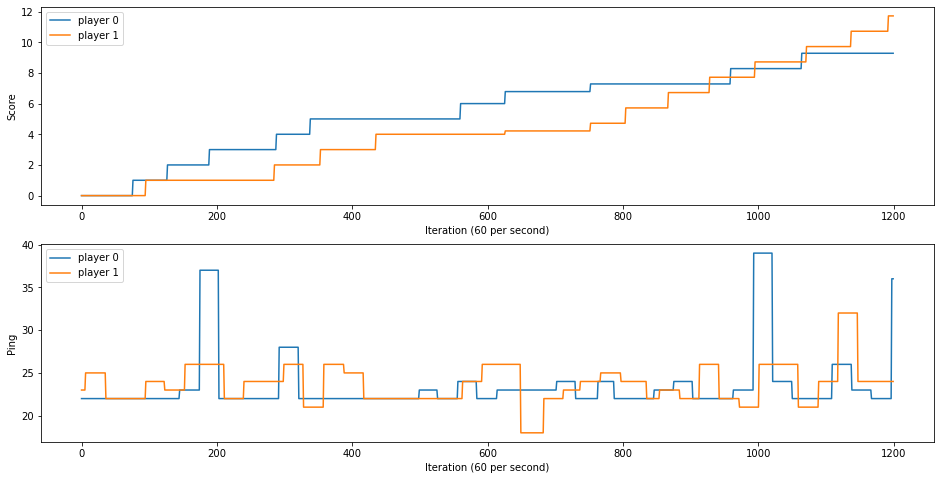

In [14]:
def plot_ping_and_score(game_data):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=((16,8)))
    ax1.set_xlabel(f'Iteration ({conf.pos_updates_ps} per second)')
    ax1.set_ylabel('Score')
    ax1.plot(game_data['player_0_scores'], label='player 0')
    ax1.plot(game_data['player_1_scores'], label='player 1')
    ax1.legend()
    ax2.set_xlabel(f'Iteration ({conf.pos_updates_ps} per second)')
    ax2.set_ylabel('Ping')
    ax2.plot(game_data['player_0_pings'], label='player 0')
    ax2.plot(game_data['player_1_pings'], label='player 1')
    ax2.legend()
    
plot_ping_and_score(game_data)